In [1]:
#we shall import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df1.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [8]:
# EDA 

In [9]:
df1.drop(['availability','society','balcony'],axis = 1,inplace=True)

In [10]:
df1

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [11]:
df1.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df1.isna().sum()/len(df1)*100

area_type     0.000000
location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

In [13]:
df2 = df1.dropna()

### Checkpoint 1

In [14]:
df2.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df1.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df2['size'].nunique()

31

In [19]:
df2['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [20]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split()[0]))

C:\Users\Shridhar\AppData\Local\Temp\ipykernel_15928\3784117381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : int(x.split()[0]))


In [21]:
df2

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   price       13246 non-null  float64
 6   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 827.9+ KB


In [23]:
df2.drop(['size'],axis = 1,inplace= True)


C:\Users\Shridhar\AppData\Local\Temp\ipykernel_15928\3760756357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['size'],axis = 1,inplace= True)


In [24]:
df2

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


In [25]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [26]:
temp_df = df2.loc[df2['bhk'] >= 12]
temp_df

,area_type,location,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,230.0,27
3379,Super built-up Area,1Hanuman Nagar,2000,16.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,10000,16.0,550.0,16
4684,Plot Area,Munnekollal,2400,40.0,660.0,43
4916,Super built-up Area,1Channasandra,1250,15.0,125.0,14
6533,Plot Area,Mysore Road,2232,6.0,300.0,12
9935,Super built-up Area,1Hoysalanagar,5425,13.0,275.0,13
11559,Plot Area,1Kasavanhalli,1200,18.0,200.0,18


In [27]:
index_list = temp_df.index.values.tolist() 
index_list

[1718, 3379, 3609, 4684, 4916, 6533, 9935, 11559]

In [28]:
df3 = df2.drop(index_list) # Checkpoint2 
df3

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


In [29]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
df3['total_sqft'].nunique()

2065

In [31]:
# df3['total_sqft'].astype('int')

In [32]:
df3.total_sqft.head(50)

0            1056
1            2600
2            1440
3            1521
4            1200
5            1170
6            2732
7            3300
8            1310
9            1020
10           1800
11           2785
12           1000
13           1100
14           2250
15           1175
16           1180
17           1540
18           2770
19           1100
20            600
21           1755
22           2800
23           1767
24            510
25           1250
26            660
27           1610
28           1151
29           1025
30    2100 - 2850
31           1075
32           1760
33           1693
34           1925
35            700
36           1070
37           1724
38           1290
39           1143
40           1296
41           1254
42            600
43            660
44        1330.74
45            600
46            970
47           1459
48            800
49            869
Name: total_sqft, dtype: object

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13238 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13238 non-null  object 
 1   location    13238 non-null  object 
 2   total_sqft  13238 non-null  object 
 3   bath        13238 non-null  float64
 4   price       13238 non-null  float64
 5   bhk         13238 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.0+ KB


In [34]:
type(df3['total_sqft'].iloc[2])

str

In [35]:
def convert_float(sqft_value):
    try:
        float(sqft_value)
    except:
        return False
    return True

In [36]:
df3.loc[df3['total_sqft'].apply(convert_float)]

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


In [37]:
df3.loc[~df3['total_sqft'].apply(convert_float)]

,area_type,location,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,59.135,2


In [38]:
def convert_range_to_num(sqft_range):
    num = sqft_range.split('-')
    if len(num) == 2:
        return(float(num[0])+float(num[1]))/2
    try: 
        return float(sqft_range)
    except:
        return None

In [39]:
convert_range_to_num('2122')

2122.0

In [40]:
convert_range_to_num('2830 - 2882')

2856.0

In [41]:
df3['total_sqft']=df3['total_sqft'].apply(convert_range_to_num)

In [158]:
df3.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [157]:
df3.dropna(inplace=True)

In [159]:
df3.sort_values(by='total_sqft')

,area_type,location,total_sqft,bath,price,bhk
4086,Plot Area,Sarjapur Road,1.0,4.0,120.0,4
4972,Built-up Area,Srirampuram,5.0,7.0,115.0,7
349,Plot Area,Suragajakkanahalli,11.0,3.0,74.0,3
1020,Carpet Area,Weavers Colony,15.0,1.0,30.0,1
1122,Built-up Area,Grihalakshmi Layout,24.0,2.0,150.0,5
...,...,...,...,...,...,...
12987,Plot Area,Dodsworth Layout,30400.0,4.0,1824.0,6
674,Built-up Area,Yelahanka,35000.0,3.0,130.0,3
5469,Super built-up Area,Ulsoor,36000.0,4.0,450.0,4
5393,Super built-up Area,Doddabommasandra,42000.0,8.0,175.0,9


In [165]:
df3.sort_values(by='total_sqft',inplace=True,ignore_index=True)

In [166]:
df3

,area_type,location,total_sqft,bath,price,bhk
0,Plot Area,Sarjapur Road,1.0,4.0,120.0,4
1,Built-up Area,Srirampuram,5.0,7.0,115.0,7
2,Plot Area,Suragajakkanahalli,11.0,3.0,74.0,3
3,Carpet Area,Weavers Colony,15.0,1.0,30.0,1
4,Built-up Area,Grihalakshmi Layout,24.0,2.0,150.0,5
...,...,...,...,...,...,...
13187,Plot Area,Dodsworth Layout,30400.0,4.0,1824.0,6
13188,Built-up Area,Yelahanka,35000.0,3.0,130.0,3
13189,Super built-up Area,Ulsoor,36000.0,4.0,450.0,4
13190,Super built-up Area,Doddabommasandra,42000.0,8.0,175.0,9


{'whiskers': [<matplotlib.lines.Line2D at 0x158c9228c70>,
 'caps': [<matplotlib.lines.Line2D at 0x158c923b340>,
 'boxes': [<matplotlib.lines.Line2D at 0x158c92289a0>],
 'medians': [<matplotlib.lines.Line2D at 0x158c923b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x158c923baf0>],
 'means': []}

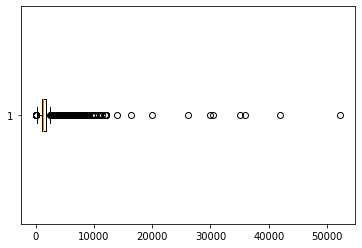

In [162]:

plt.boxplot(df3['total_sqft'], vert=False)


In [172]:
tenth_percentile = np.percentile(df3['total_sqft'], 10)
ninetieth_percentile = np.percentile(df3['total_sqft'], 90)
print(tenth_percentile, ninetieth_percentile)
values = np.where(df3['total_sqft']<tenth_percentile, tenth_percentile, df3['total_sqft'])
values= np.where(values>ninetieth_percentile, ninetieth_percentile, values)

print("New array:",values)
len(values)

900.0 2400.0
New array: [ 900.  900.  900. ... 2400. 2400. 2400.]


13192

In [179]:
t_df = pd.DataFrame(values,columns=['sqft'])
t_df

,sqft
0,900.0
1,900.0
2,900.0
3,900.0
4,900.0
...,...
13187,2400.0
13188,2400.0
13189,2400.0
13190,2400.0


In [180]:
dff= pd.concat([df3,t_df],axis=1)
dff

,area_type,location,total_sqft,bath,price,bhk,sqft
0,Plot Area,Sarjapur Road,1.0,4.0,120.0,4,900.0
1,Built-up Area,Srirampuram,5.0,7.0,115.0,7,900.0
2,Plot Area,Suragajakkanahalli,11.0,3.0,74.0,3,900.0
3,Carpet Area,Weavers Colony,15.0,1.0,30.0,1,900.0
4,Built-up Area,Grihalakshmi Layout,24.0,2.0,150.0,5,900.0
...,...,...,...,...,...,...,...
13187,Plot Area,Dodsworth Layout,30400.0,4.0,1824.0,6,2400.0
13188,Built-up Area,Yelahanka,35000.0,3.0,130.0,3,2400.0
13189,Super built-up Area,Ulsoor,36000.0,4.0,450.0,4,2400.0
13190,Super built-up Area,Doddabommasandra,42000.0,8.0,175.0,9,2400.0


In [181]:
dff.drop(['total_sqft'],axis=1,inplace=True)

In [182]:
dff

,area_type,location,bath,price,bhk,sqft
0,Plot Area,Sarjapur Road,4.0,120.0,4,900.0
1,Built-up Area,Srirampuram,7.0,115.0,7,900.0
2,Plot Area,Suragajakkanahalli,3.0,74.0,3,900.0
3,Carpet Area,Weavers Colony,1.0,30.0,1,900.0
4,Built-up Area,Grihalakshmi Layout,2.0,150.0,5,900.0
...,...,...,...,...,...,...
13187,Plot Area,Dodsworth Layout,4.0,1824.0,6,2400.0
13188,Built-up Area,Yelahanka,3.0,130.0,3,2400.0
13189,Super built-up Area,Ulsoor,4.0,450.0,4,2400.0
13190,Super built-up Area,Doddabommasandra,8.0,175.0,9,2400.0


area_type      0
location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [183]:
df3 = dff.copy()

In [184]:
df3.isna().sum()

area_type    0
location     0
bath         0
price        0
bhk          0
sqft         0
dtype: int64

In [ ]:
len(total_sqft_count[total_sqft_count<=15])

In [185]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13192 entries, 0 to 13191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  13192 non-null  object 
 1   location   13192 non-null  object 
 2   bath       13192 non-null  float64
 3   price      13192 non-null  float64
 4   bhk        13192 non-null  int64  
 5   sqft       13192 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 618.5+ KB


In [186]:
df4 = df3.copy() ## Checkpoint 

In [187]:
df4.isna().sum()

area_type    0
location     0
bath         0
price        0
bhk          0
sqft         0
dtype: int64

In [188]:
df4.head()

,area_type,location,bath,price,bhk,sqft
0,Plot Area,Sarjapur Road,4.0,120.0,4,900.0
1,Built-up Area,Srirampuram,7.0,115.0,7,900.0
2,Plot Area,Suragajakkanahalli,3.0,74.0,3,900.0
3,Carpet Area,Weavers Colony,1.0,30.0,1,900.0
4,Built-up Area,Grihalakshmi Layout,2.0,150.0,5,900.0


In [192]:
df4.sqft.value_counts()

2400.0    1498
900.0     1411
1200.0     842
1100.0     221
1500.0     204
          ... 
1888.0       1
1886.0       1
1529.0       1
1641.0       1
1443.0       1
Name: sqft, Length: 1211, dtype: int64

In [193]:
df4['price'] = df4['price']*100000
df4

,area_type,location,bath,price,bhk,sqft
0,Plot Area,Sarjapur Road,4.0,12000000.0,4,900.0
1,Built-up Area,Srirampuram,7.0,11500000.0,7,900.0
2,Plot Area,Suragajakkanahalli,3.0,7400000.0,3,900.0
3,Carpet Area,Weavers Colony,1.0,3000000.0,1,900.0
4,Built-up Area,Grihalakshmi Layout,2.0,15000000.0,5,900.0
...,...,...,...,...,...,...
13187,Plot Area,Dodsworth Layout,4.0,182400000.0,6,2400.0
13188,Built-up Area,Yelahanka,3.0,13000000.0,3,2400.0
13189,Super built-up Area,Ulsoor,4.0,45000000.0,4,2400.0
13190,Super built-up Area,Doddabommasandra,8.0,17500000.0,9,2400.0


In [194]:
# df4['price_per_sqft']=df4['price']/df4['total_sqft']

In [195]:
df4

,area_type,location,bath,price,bhk,sqft
0,Plot Area,Sarjapur Road,4.0,12000000.0,4,900.0
1,Built-up Area,Srirampuram,7.0,11500000.0,7,900.0
2,Plot Area,Suragajakkanahalli,3.0,7400000.0,3,900.0
3,Carpet Area,Weavers Colony,1.0,3000000.0,1,900.0
4,Built-up Area,Grihalakshmi Layout,2.0,15000000.0,5,900.0
...,...,...,...,...,...,...
13187,Plot Area,Dodsworth Layout,4.0,182400000.0,6,2400.0
13188,Built-up Area,Yelahanka,3.0,13000000.0,3,2400.0
13189,Super built-up Area,Ulsoor,4.0,45000000.0,4,2400.0
13190,Super built-up Area,Doddabommasandra,8.0,17500000.0,9,2400.0


In [196]:
df4.location.unique()

array(['Sarjapur  Road', 'Srirampuram', 'Suragajakkanahalli', ...,
       '4 Bedroom Farm House in Bagalur', 'SARJAPUR BAGALUR ROAD',
       'Jp nagar 8th Phase .'], dtype=object)

In [197]:
df4.location.nunique()

1293

In [198]:
df4.location.value_counts()

Whitefield                 532
Sarjapur  Road             392
Electronic City            302
Kanakpura Road             264
Thanisandra                232
                          ... 
Kumbhena Agrahara            1
BEML Layout 5th Stage        1
mvj engineering college      1
Ramanagara Channapatna       1
Jp nagar 8th Phase .         1
Name: location, Length: 1293, dtype: int64

In [199]:
location_count = df4.location.value_counts()

In [200]:
location_count

Whitefield                 532
Sarjapur  Road             392
Electronic City            302
Kanakpura Road             264
Thanisandra                232
                          ... 
Kumbhena Agrahara            1
BEML Layout 5th Stage        1
mvj engineering college      1
Ramanagara Channapatna       1
Jp nagar 8th Phase .         1
Name: location, Length: 1293, dtype: int64

In [201]:
location_count.head(50)

Whitefield                  532
Sarjapur  Road              392
Electronic City             302
Kanakpura Road              264
Thanisandra                 232
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           151
Hennur Road                 150
7th Phase JP Nagar          148
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
Hoodi                        88
KR Puram                     88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     80
Harlur                       79
Kasavanhalli                 79
Hormavu                      74
Banashankari                 74
Koramangala                  72
Ramamurthy Nagar             72
Kengeri                      72
Varthur 

In [202]:
len(location_count[location_count<=15])

1114

In [203]:
len(location_count[location_count<=10])

1053

In [204]:
len(location_count[location_count<=20])

1150

In [205]:
df4['location'] = df4['location'].apply(lambda x : 'Others' if x in location_count[location_count<=20] else x)
df4

,area_type,location,bath,price,bhk,sqft
0,Plot Area,Sarjapur Road,4.0,12000000.0,4,900.0
1,Built-up Area,Others,7.0,11500000.0,7,900.0
2,Plot Area,Others,3.0,7400000.0,3,900.0
3,Carpet Area,Others,1.0,3000000.0,1,900.0
4,Built-up Area,Others,2.0,15000000.0,5,900.0
...,...,...,...,...,...,...
13187,Plot Area,Others,4.0,182400000.0,6,2400.0
13188,Built-up Area,Yelahanka,3.0,13000000.0,3,2400.0
13189,Super built-up Area,Ulsoor,4.0,45000000.0,4,2400.0
13190,Super built-up Area,Others,8.0,17500000.0,9,2400.0


In [206]:
df4['location'].value_counts()

Others                4281
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
                      ... 
Kathriguppe             22
Rayasandra              22
Hoskote                 21
Basaveshwara Nagar      21
Ulsoor                  21
Name: location, Length: 144, dtype: int64

In [253]:
df4['location']

0        Sarjapur  Road
1                Others
2                Others
3                Others
4                Others
              ...      
13187            Others
13188         Yelahanka
13189            Ulsoor
13190            Others
13191            Others
Name: location, Length: 13192, dtype: object

In [207]:
df5 = df4.copy() ### checkpoint 

In [208]:
df5.isna().sum()

area_type    0
location     0
bath         0
price        0
bhk          0
sqft         0
dtype: int64

In [209]:
df5.dropna(inplace=True)

In [210]:
df5.head()

,area_type,location,bath,price,bhk,sqft
0,Plot Area,Sarjapur Road,4.0,12000000.0,4,900.0
1,Built-up Area,Others,7.0,11500000.0,7,900.0
2,Plot Area,Others,3.0,7400000.0,3,900.0
3,Carpet Area,Others,1.0,3000000.0,1,900.0
4,Built-up Area,Others,2.0,15000000.0,5,900.0


In [211]:
df5['area_type'].unique()

array(['Plot  Area', 'Built-up  Area', 'Carpet  Area',
       'Super built-up  Area'], dtype=object)

In [212]:
dummies = pd.get_dummies(df5.area_type)
dummies.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0


In [213]:
df5 = pd.concat([df5,dummies],axis=1)
df5.head()

,area_type,location,bath,price,bhk,sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Plot Area,Sarjapur Road,4.0,12000000.0,4,900.0,0,0,1,0
1,Built-up Area,Others,7.0,11500000.0,7,900.0,1,0,0,0
2,Plot Area,Others,3.0,7400000.0,3,900.0,0,0,1,0
3,Carpet Area,Others,1.0,3000000.0,1,900.0,0,1,0,0
4,Built-up Area,Others,2.0,15000000.0,5,900.0,1,0,0,0


In [214]:
dummies = pd.get_dummies(df5['location'])
dummies.head(3)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
df5 = pd.concat([df5,dummies],axis=1)
df5.head()

,area_type,location,bath,price,bhk,sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Plot Area,Sarjapur Road,4.0,12000000.0,4,900.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Others,7.0,11500000.0,7,900.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Plot Area,Others,3.0,7400000.0,3,900.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Carpet Area,Others,1.0,3000000.0,1,900.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Built-up Area,Others,2.0,15000000.0,5,900.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
df5.drop(['area_type','location'],axis=1,inplace=True)

In [217]:
df5.to_csv('clean_data.csv',index=False)

In [218]:
y = df5['price']
x = df5.drop(['price'],axis=1)

In [220]:
total_sqft_max = x['sqft'].max()
total_sqft_max

2400.0

In [223]:
sqft_max = x['sqft'].max()
sqft_min = x['sqft'].min()

bath_max =x['bath'].max()
bath_min = x['bath'].min()

bhk_max = x['bhk'].max()
bhk_min = x['bhk'].min()


In [224]:
import json

min_max = {
    'sqft_max' : sqft_max,
    'sqft_min' : sqft_min,
    'bath_max' : bath_max,
    'bath_min':bath_min ,
    'bhk_max':bhk_max,
    'bhk_min':bhk_min
    
}
min_max
# with open("columns1.json","w") as f:
#     f.write(json.dumps(columns))

{'sqft_max': 2400.0,
 'sqft_min': 900.0,
 'bath_max': 14.0,
 'bath_min': 1.0,
 'bhk_max': 11,
 'bhk_min': 1}

In [225]:
y

0         12000000.0
1         11500000.0
2          7400000.0
3          3000000.0
4         15000000.0
            ...     
13187    182400000.0
13188     13000000.0
13189     45000000.0
13190     17500000.0
13191     14000000.0
Name: price, Length: 13192, dtype: float64

In [226]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [227]:
x_train

,bath,bhk,sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
858,2.0,2,900.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11356,3.0,3,2100.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4940,3.0,4,1200.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,2.0,2,1113.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1878,2.0,2,993.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,3.0,3,1900.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,3.0,2,900.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,2.0,3,1200.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12172,3.0,3,2400.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [229]:
# normalise
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

In [230]:
x_test

array([[0.15384615, 0.2       , 0.54333333, ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.1       , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.1       , 0.16      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.1       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.1       , 0.22333333, ..., 0.        , 0.        ,
        0.        ],
       [0.15384615, 0.2       , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [231]:
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

y_pred = l_reg.predict(x_test)


l_acc = r2_score(y_test,y_pred)
l_mse = mean_squared_error(y_test,y_pred)
l_mae = mean_absolute_error(y_test,y_pred)

print(f'Accuracy={l_acc}')
print(f'MSE={l_mse}')
print(f'MAE={l_mae}')


Accuracy=0.4185668971280647
MSE=118498619345535.95
MAE=4799056.686623721


In [232]:
k_reg = KNeighborsRegressor()
k_reg.fit(x_train,y_train)

y_pred_k_reg = k_reg.predict(x_test)


k_acc = r2_score(y_test,y_pred_k_reg)
k_mse = mean_squared_error(y_test,y_pred_k_reg)
k_mae = mean_absolute_error(y_test,y_pred_k_reg)

print(f'Accuracy={k_acc}')
print(f'MSE={k_mse}')
print(f'MAE={k_mae}')


Accuracy=0.38910322566435707
MSE=124503444960132.62
MAE=3891311.1405835543


In [233]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train,y_train)

y_pred_d_reg = d_reg.predict(x_test)


d_acc = r2_score(y_test,y_pred_d_reg)
d_mse = mean_squared_error(y_test,y_pred_d_reg)
d_mae = mean_absolute_error(y_test,y_pred_d_reg)

print(f'Accuracy={d_acc}')
print(f'MSE={d_mse}')
print(f'MAE={d_mae}')

Accuracy=0.3687086940735027
MSE=128659940047491.73
MAE=3926996.5044980566


In [234]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train,y_train)

y_pred_r_reg = r_reg.predict(x_test)


r_acc = r2_score(y_test,y_pred_r_reg)
r_mse = mean_squared_error(y_test,y_pred_r_reg)
r_mae = mean_absolute_error(y_test,y_pred_r_reg)

print(f'Accuracy={r_acc}')
print(f'MSE={r_mse}')
print(f'MAE={r_mae}')

Accuracy=0.441261199459261
MSE=113873420883367.8
MAE=3600159.982025726


In [235]:
x_reg = XGBRegressor()
x_reg.fit(x_train,y_train)

y_pred_x_reg = x_reg.predict(x_test)


x_acc = r2_score(y_test,y_pred_x_reg)
x_mse = mean_squared_error(y_test,y_pred_x_reg)
x_mae = mean_absolute_error(y_test,y_pred_x_reg)

print(f'Accuracy={x_acc}')
print(f'MSE={x_mse}')
print(f'MAE={x_mae}')

Accuracy=0.46701384532086454
MSE=108624918581002.84
MAE=3629468.3951780978


In [236]:
models = pd.DataFrame({
    'Models': ['Linear','KNN','DecisionTree','RandomForest','XGB'],
    'Scores': [l_acc,k_acc,d_acc,r_acc,x_acc]

})

In [237]:
models

,Models,Scores
0,Linear,0.418567
1,KNN,0.389103
2,DecisionTree,0.368709
3,RandomForest,0.441261
4,XGB,0.467014


In [238]:
models.sort_values(by = ['Scores'])

,Models,Scores
2,DecisionTree,0.368709
1,KNN,0.389103
0,Linear,0.418567
3,RandomForest,0.441261
4,XGB,0.467014


In [243]:
import pickle

In [244]:
model_file = open('hpp_model.pickle','wb')
pickle.dump(x_reg,model_file)
model_file.close()

In [245]:
df5.head()

,bath,price,bhk,sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4.0,12000000.0,4,900.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,11500000.0,7,900.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,7400000.0,3,900.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3000000.0,1,900.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,15000000.0,5,900.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
x_test

array([[0.15384615, 0.2       , 0.54333333, ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.1       , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.1       , 0.16      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.1       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.1       , 0.22333333, ..., 0.        , 0.        ,
        0.        ],
       [0.15384615, 0.2       , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [247]:
from sklearn.preprocessing import inverse_transform

ImportError: cannot import name 'inverse_transform' from 'sklearn.preprocessing' (C:\Users\Shridhar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\__init__.py)

In [250]:
def predict_price(sqft,bath,bhk,area_type,location):    
#     loc_index = np.where(X.columns==location)[0][0]
    columns_list = x.columns
    columns_list = columns_list.tolist()
    
    
    x_user = np.zeros(len(x.columns)) # 151 Columns x == [0 0 0 ... 0] >> 151
    scaled_sqft = sqft - sqft_min / sqft_max - sqft_min
    x_user[0] = scaled_sqft
    
    scaled_bath = bath - bath_min / bath_max-bath_min
    x_user[1] = scaled_bath
    
    scaled_bhk = bhk - bhk_min / bhk_max - bhk_min
    x_user[2] = scaled_bhk
    
    
    
    area_type_index = columns_list.index(area_type)
    x_user[area_type_index] = 1   # area_index = 135
    
    
    loc_index = columns_list.index(location)
    x_user[loc_index] = 1
    
   
    return x_reg.predict([x_user])[0] 

In [251]:
predict_price(700,2,2,'Carpet  Area','5th Phase JP Nagar') 

17916404.0

,bath,bhk,sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4.0,4,900.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,7,900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,3,900.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,900.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,5,900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13187,4.0,6,2400.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13188,3.0,3,2400.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13189,4.0,4,2400.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13190,8.0,9,2400.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train


In [256]:
import json
column_names = [col.lower() for col in x.columns]
columns = {
    'data_columns' : column_names}
    

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

['built-up  area', 'carpet  area', 'plot  area', 'super built-up  area']

In [260]:
import json

location = {
    'locations' : column_names[7:]}
    

with open("location.json","w") as f:
    f.write(json.dumps(columns))

In [263]:
import json

area_type = {
    'area_type' : column_names[3:7]}
    

with open("area_type.json","w") as f:
    f.write(json.dumps(columns))